In [43]:
%cd /media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortModels/

/media/eel/DATAUbuntu/Projetos/Pub2023-2024/PortModels


### Import Libraries

In [44]:
import pandas as pd
#from functions import *
import ipywidgets as widgets
from ipywidgets import interact, fixed, interact_manual
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
from pycaret.classification import *
from sklearn.metrics import confusion_matrix

### Data preparation

The following data represents the results of all technical indicators utilized in this study, calculated at the end of each month from January 2023 to May 2024. These files were derived from a dataset originally containing daily data.

In [45]:
dta0_01 = pd.read_csv('data/raw/jan2023.csv')
dta0_02 = pd.read_csv('data/raw/fev2023.csv')
dta0_03 = pd.read_csv('data/raw/mar2023.csv')
dta0_04 = pd.read_csv('data/raw/abr2023.csv')
dta0_05 = pd.read_csv('data/raw/mai2023.csv')
dta0_06 = pd.read_csv('data/raw/jun2023.csv')
dta0_07 = pd.read_csv('data/raw/jul2023.csv')
dta0_08 = pd.read_csv('data/raw/ago2023.csv')
dta0_09 = pd.read_csv('data/raw/set2023.csv')
dta0_10 = pd.read_csv('data/raw/out2023.csv')
dta0_11 = pd.read_csv('data/raw/nov2023.csv')
data0_0 = pd.read_csv('data/raw/dez2023.csv')
data0_1 = pd.read_csv('data/raw/jan2024.csv')
data0_2 = pd.read_csv('data/raw/fev2024.csv')
data0_3 = pd.read_csv('data/raw/mar2024.csv')

# the next two files are exclusively used for unseen predictions
data0_4 = pd.read_csv('data/raw/abr2024.csv')
data0_5 = pd.read_csv('data/raw/mai2024.csv')

Since the dataset lacks a date column, we create one to facilitate debugging.

In [46]:
dta0_01['Date'] = '2023-01'
dta0_02['Date'] = '2023-02'
dta0_03['Date'] = '2023-03'
dta0_04['Date'] = '2023-04'
dta0_05['Date'] = '2023-05'
dta0_06['Date'] = '2023-06'
dta0_07['Date'] = '2023-07'
dta0_08['Date'] = '2023-08'
dta0_09['Date'] = '2023-09'
dta0_10['Date'] = '2023-10'
dta0_11['Date'] = '2023-11'
data0_0['Date'] = '2023-12'
data0_1['Date'] = '2024-01'
data0_2['Date'] = '2024-02'
data0_3['Date'] = '2024-03'

Slicing data based on the number of investors and fund classificationn, where the CNPJ serves as the unique identifier for each fund.

In [47]:
cpj01 = dta0_01['CNPJ do fundo'].loc[ (dta0_01['Cotistas'] > 100) & (dta0_01['Classe N1'] == 'Ações')].values
cpj02 = dta0_02['CNPJ do fundo'].loc[ (dta0_02['Cotistas'] > 100) & (dta0_02['Classe N1'] == 'Ações')].values
cpj03 = dta0_03['CNPJ do fundo'].loc[ (dta0_03['Cotistas'] > 100) & (dta0_03['Classe N1'] == 'Ações')].values
cpj04 = dta0_04['CNPJ do fundo'].loc[ (dta0_04['Cotistas'] > 100) & (dta0_04['Classe N1'] == 'Ações')].values
cpj05 = dta0_05['CNPJ do fundo'].loc[ (dta0_05['Cotistas'] > 100) & (dta0_05['Classe N1'] == 'Ações')].values     
cpj06 = dta0_06['CNPJ do fundo'].loc[ (dta0_06['Cotistas'] > 100) & (dta0_06['Classe N1'] == 'Ações')].values     
cpj07 = dta0_07['CNPJ do fundo'].loc[ (dta0_07['Cotistas'] > 100) & (dta0_07['Classe N1'] == 'Ações')].values        
cpj08 = dta0_08['CNPJ do fundo'].loc[ (dta0_08['Cotistas'] > 100) & (dta0_08['Classe N1'] == 'Ações')].values        
cpj09 = dta0_09['CNPJ do fundo'].loc[ (dta0_09['Cotistas'] > 100) & (dta0_09['Classe N1'] == 'Ações')].values        
cpj10 = dta0_10['CNPJ do fundo'].loc[ (dta0_10['Cotistas'] > 100) & (dta0_10['Classe N1'] == 'Ações')].values        
cpj11 = dta0_11['CNPJ do fundo'].loc[ (dta0_11['Cotistas'] > 100) & (dta0_11['Classe N1'] == 'Ações')].values
cnpj0 = data0_0['CNPJ do fundo'].loc[ (data0_0['Cotistas'] > 100) & (data0_0['Classe N1'] == 'Ações')].values
cnpj1 = data0_1['CNPJ do fundo'].loc[ (data0_1['Cotistas'] > 100) & (data0_1['Classe N1'] == 'Ações')].values
cnpj2 = data0_2['CNPJ do fundo'].loc[ (data0_2['Cotistas'] > 100) & (data0_2['Classe N1'] == 'Ações')].values
cnpj3 = data0_3['CNPJ do fundo'].loc[ (data0_3['Cotistas'] > 100) & (data0_3['Classe N1'] == 'Ações')].values

# the next two variables are exclusively used for unseen predictions
cnpj4 = data0_4['CNPJ do fundo'].loc[ (data0_4['Cotistas'] > 100) & (data0_4['Classe N1'] == 'Ações')].values
cnpj5 = data0_5['CNPJ do fundo'].loc[ (data0_5['Cotistas'] > 100) & (data0_5['Classe N1'] == 'Ações')].values

Data Transformation: This step involves the main data processing where we create the shifted return, which serves as the basis for defining the labels used in the classification algorithms. For a given month $t$, we select the funds (identified by their CNPJ) and verify which funds, in the subsequent month $t+1$, still meet the requirements established in the previous filtering step. Then, we assign the return of month $t+1$ to the corresponding row for month $t$. In the code, 'Rentabilidade No mês' represents the 1-month return for month $t$, while 'Rentabilidade 1M' corresponds to the 1-month return for month $t+1$.


In [48]:
set1 = set(cpj01)
set2 = set(cpj02)
matches01 = list(set1.intersection(set2))
dta01  = dta0_01.loc[dta0_01['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_02.loc[dta0_02['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta01 = dta01.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj02)
set2 = set(cpj03)
matches01 = list(set1.intersection(set2))
dta02  = dta0_02.loc[dta0_02['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_03.loc[dta0_03['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta02 = dta02.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj03)
set2 = set(cpj04)
matches01 = list(set1.intersection(set2))
dta03  = dta0_03.loc[dta0_03['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_04.loc[dta0_04['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta03 = dta03.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj04)
set2 = set(cpj05)
matches01 = list(set1.intersection(set2))
dta04  = dta0_04.loc[dta0_04['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_05.loc[dta0_05['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta04 = dta04.merge(rent1M, how='inner', on='CNPJ do fundo')


set1 = set(cpj05)
set2 = set(cpj06)
matches01 = list(set1.intersection(set2))
dta05  = dta0_05.loc[dta0_05['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_06.loc[dta0_06['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta05 = dta05.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj06)
set2 = set(cpj07)
matches01 = list(set1.intersection(set2))
dta06  = dta0_06.loc[dta0_06['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_07.loc[dta0_07['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta06 = dta06.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj07)
set2 = set(cpj08)
matches01 = list(set1.intersection(set2))
dta07  = dta0_07.loc[dta0_07['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_08.loc[dta0_08['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta07 = dta07.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj08)
set2 = set(cpj09)
matches01 = list(set1.intersection(set2))
dta08  = dta0_08.loc[dta0_08['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_09.loc[dta0_09['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta08 = dta08.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj09)
set2 = set(cpj10)
matches01 = list(set1.intersection(set2))
dta09  = dta0_09.loc[dta0_09['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_10.loc[dta0_10['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta09 = dta09.merge(rent1M, how='inner', on='CNPJ do fundo')
                
set1 = set(cpj10)
set2 = set(cpj11)
matches01 = list(set1.intersection(set2))
dta10  = dta0_10.loc[dta0_10['CNPJ do fundo'].isin(matches01)]
rent1M = dta0_11.loc[dta0_11['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta10 = dta10.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cpj11)
set2 = set(cnpj0)
matches01 = list(set1.intersection(set2))
dta11  = dta0_11.loc[dta0_11['CNPJ do fundo'].isin(matches01)]
rent1M = data0_0.loc[data0_0['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
dta11 = dta11.merge(rent1M, how='inner', on='CNPJ do fundo')

set1 = set(cnpj0)
set2 = set(cnpj1)
matches01 = list(set1.intersection(set2))
data0  = data0_0.loc[data0_0['CNPJ do fundo'].isin(matches01)]
rent1M = data0_1.loc[data0_1['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data0 = data0.merge(rent1M, how='inner', on='CNPJ do fundo')


set1 = set(cnpj1)
set2 = set(cnpj2)
matches01 = list(set1.intersection(set2))
data1  = data0_1.loc[data0_1['CNPJ do fundo'].isin(matches01)]
rent1M = data0_2.loc[data0_2['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data1 = data1.merge(rent1M, how='inner', on='CNPJ do fundo')


set1 = set(cnpj2)
set2 = set(cnpj3)
matches01 = list(set1.intersection(set2))
data2  = data0_2.loc[data0_2['CNPJ do fundo'].isin(matches01)]
rent1M = data0_3.loc[data0_3['CNPJ do fundo'].isin(matches01)][['CNPJ do fundo','Rentabilidade No mês']]
rent1M['Rentabilidade 1M'] = rent1M['Rentabilidade No mês']
rent1M.drop(columns='Rentabilidade No mês', inplace=True)
data2 = data2.merge(rent1M, how='inner', on='CNPJ do fundo')

data = pd.concat([ dta01, dta02, dta03, dta04, dta05, dta06, dta07, dta08, dta09, dta10, dta11, data0, data1, data2], ignore_index=True)
data.head(3)

,Nome do fundo,CNPJ do fundo,cnpj,Classe N1,Patrimônio líquido,Cotistas,Valor da cota,Variação da Cota,Drawdown máximo,Rentabilidade No mês,...,Information Ratio 36 meses,Information Ratio 48 meses,Information Ratio 60 meses,Information Ratio 120 meses,Índice de Treynor 36 meses,Índice de Treynor 48 meses,Índice de Treynor 60 meses,Índice de Treynor 120 meses,Date,Rentabilidade 1M
0,KAPITALO NW3 PLUS FIC FIA,26396708000105,26396708000105,Ações,3.124270e+08,209.0,1.721758,0.999438,0.234871,0.004679,...,0.205317,0.111525,0.096308,NaN,0.234353,0.130140,0.126632,NaN,2023-01,0.005311
1,LOGOS LONG BIASED FIC FIA,32295931000150,32295931000150,Ações,2.034791e+07,149.0,1.884993,1.023862,0.455493,0.016681,...,0.103878,0.608321,NaN,NaN,0.019024,0.105456,NaN,NaN,2023-01,-0.103180
2,TRACK BOLSA AMERICANA FIA,40938273000104,40938273000104,Ações,3.228408e+06,329.0,1.136129,1.013805,0.200563,0.066748,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-01,-0.016200


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13465 entries, 0 to 13464
Data columns (total 83 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Nome do fundo                13465 non-null  object 
 1   CNPJ do fundo                13465 non-null  int64  
 2   cnpj                         13465 non-null  int64  
 3   Classe N1                    13465 non-null  object 
 4   Patrimônio líquido           13465 non-null  float64
 5   Cotistas                     13465 non-null  float64
 6   Valor da cota                13465 non-null  float64
 7   Variação da Cota             13463 non-null  float64
 8   Drawdown máximo              13463 non-null  float64
 9   Rentabilidade No mês         13453 non-null  float64
 10  Rentabilidade 3 meses        13397 non-null  float64
 11  Rentabilidade 6 meses        13297 non-null  float64
 12  Rentabilidade 12 meses       12905 non-null  float64
 13  Rentabilidade 24

Next, we remove columns that are not relevant for the experiments.

In [50]:
feat_drop = ['Nome do fundo','cnpj', 'Classe N1',
        'Patrimônio líquido', 'Cotistas', 'Valor da cota', 'Variação da Cota',
        'Drawdown máximo']

feat_dropt = ['Nome do fundo','cnpj', 'Classe N1',
        'Patrimônio líquido', 'Cotistas', 'Valor da cota', 'Variação da Cota',
        'Drawdown máximo']

data.dropna(axis=0, inplace=True)
data.drop(columns=feat_drop, inplace=True)
data.reset_index(drop=True, inplace=True)

#### DATA VALIDATION

Before defining the labels, we first explore the data for validation purposes. To do this, we slice the dataset and compare the values with those from a commercial website. Specifically, we create a slice for a particular fund and select only a subset of relevant features to visualize.

In [51]:
df = data[data['CNPJ do fundo'] == 8336054000134].iloc[:,[73, 1, 74, 2,3,4,44, 6,7, 8]]
df

,Date,Rentabilidade No mês,Rentabilidade 1M,Rentabilidade 3 meses,Rentabilidade 6 meses,Rentabilidade 12 meses,Rentabilidade 120 meses,Volatilidade No mês,Volatilidade 3 meses,Volatilidade 6 meses
223,2023-01,0.061076,-0.031836,-0.003206,0.065805,0.333016,1.923726,0.401812,0.398719,0.432943
584,2023-02,-0.031836,-0.070622,0.002443,-0.156276,0.252869,2.096518,0.360742,0.387293,0.429893
976,2023-03,-0.070622,0.131442,-0.045253,-0.101672,0.199251,1.701155,0.308832,0.336380,0.408405
1281,2023-04,0.131442,0.091902,0.035824,-0.069530,0.348498,1.713167,0.333871,0.332616,0.366084
1587,2023-05,0.091902,0.189948,0.145483,0.142686,0.333743,1.899742,0.300154,0.315338,0.346793
1882,2023-06,0.189948,0.049165,0.470091,0.403564,0.662484,3.270021,0.376057,0.333412,0.337039
2364,2023-07,0.049165,0.059981,0.363187,0.407136,0.479132,3.286023,0.286364,0.314070,0.323097
2606,2023-08,0.059981,0.078341,0.284485,0.515858,0.303815,3.591302,0.233485,0.298908,0.307066
3055,2023-09,0.078341,0.002645,0.199217,0.724973,0.583715,3.539103,0.222482,0.245146,0.292983
3404,2023-10,0.002645,0.069234,0.163687,0.562272,0.585389,3.215778,0.371290,0.279730,0.296270


The results can be compared to https://maisretorno.com/fundo/sicredi-fia-petrobras

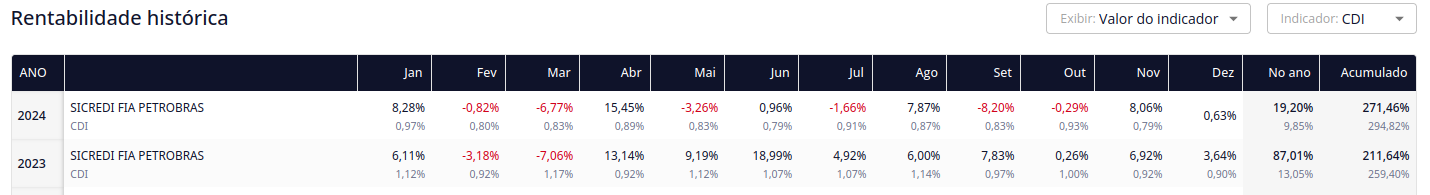

Returning to the main data set, we compute mean and std of considering all 4970 rows for collum 'Rentabilidade 1M'.

In [52]:
data['Rentabilidade 1M'].mean()

0.009668797786720324

In [53]:
data['Rentabilidade 1M'].std()

0.06363163087970403

#### Label definition

In [54]:
data['Cluster'] = 0
data['Cluster'].loc[ data['Rentabilidade 1M'] < (data['Rentabilidade 1M'].mean() - 0.5*data['Rentabilidade 1M'].std())] = -1.0
data['Cluster'].loc[ data['Rentabilidade 1M'] > (data['Rentabilidade 1M'].mean() + 0.5*data['Rentabilidade 1M'].std())] =  1.0

Rechecking the data for a specific fund.

In [55]:
data[data['CNPJ do fundo'] == 8336054000134].iloc[:,[73, 1, 74, 75, 2,3,6,7, 8]]

,Date,Rentabilidade No mês,Rentabilidade 1M,Cluster,Rentabilidade 3 meses,Rentabilidade 6 meses,Volatilidade No mês,Volatilidade 3 meses,Volatilidade 6 meses
223,2023-01,0.061076,-0.031836,-1,-0.003206,0.065805,0.401812,0.398719,0.432943
584,2023-02,-0.031836,-0.070622,-1,0.002443,-0.156276,0.360742,0.387293,0.429893
976,2023-03,-0.070622,0.131442,1,-0.045253,-0.101672,0.308832,0.336380,0.408405
1281,2023-04,0.131442,0.091902,1,0.035824,-0.069530,0.333871,0.332616,0.366084
1587,2023-05,0.091902,0.189948,1,0.145483,0.142686,0.300154,0.315338,0.346793
1882,2023-06,0.189948,0.049165,1,0.470091,0.403564,0.376057,0.333412,0.337039
2364,2023-07,0.049165,0.059981,1,0.363187,0.407136,0.286364,0.314070,0.323097
2606,2023-08,0.059981,0.078341,1,0.284485,0.515858,0.233485,0.298908,0.307066
3055,2023-09,0.078341,0.002645,0,0.199217,0.724973,0.222482,0.245146,0.292983
3404,2023-10,0.002645,0.069234,1,0.163687,0.562272,0.371290,0.279730,0.296270


In [56]:
data[data['CNPJ do fundo'] == 8336054000134].iloc[:,[73, 1, 2, 6, 7, 11, 12, 74, 75]]

,Date,Rentabilidade No mês,Rentabilidade 3 meses,Volatilidade No mês,Volatilidade 3 meses,Beta No mês,Beta 3 meses,Rentabilidade 1M,Cluster
223,2023-01,0.061076,-0.003206,0.401812,0.398719,1.294686,1.125024,-0.031836,-1
584,2023-02,-0.031836,0.002443,0.360742,0.387293,1.173587,1.213534,-0.070622,-1
976,2023-03,-0.070622,-0.045253,0.308832,0.336380,0.926783,1.044430,0.131442,1
1281,2023-04,0.131442,0.035824,0.333871,0.332616,0.920402,1.007187,0.091902,1
1587,2023-05,0.091902,0.145483,0.300154,0.315338,0.790979,0.892930,0.189948,1
1882,2023-06,0.189948,0.470091,0.376057,0.333412,1.289548,0.978592,0.049165,1
2364,2023-07,0.049165,0.363187,0.286364,0.314070,1.338841,1.086866,0.059981,1
2606,2023-08,0.059981,0.284485,0.233485,0.298908,1.155156,1.236188,0.078341,1
3055,2023-09,0.078341,0.199217,0.222482,0.245146,0.236175,0.925899,0.002645,0
3404,2023-10,0.002645,0.163687,0.371290,0.279730,0.194484,0.604194,0.069234,1


Rechecking the data set.

In [57]:
data.head(3)

,CNPJ do fundo,Rentabilidade No mês,Rentabilidade 3 meses,Rentabilidade 6 meses,Rentabilidade 12 meses,Rentabilidade 24 meses,Volatilidade No mês,Volatilidade 3 meses,Volatilidade 6 meses,Volatilidade 12 meses,...,Information Ratio 48 meses,Information Ratio 60 meses,Information Ratio 120 meses,Índice de Treynor 36 meses,Índice de Treynor 48 meses,Índice de Treynor 60 meses,Índice de Treynor 120 meses,Date,Rentabilidade 1M,Cluster
0,13950062000106,0.045134,-0.117370,0.050586,-0.070121,-0.227474,0.190753,0.228272,0.204698,0.196921,...,0.329760,0.266957,0.210171,-0.075142,0.054027,0.046860,0.062370,2023-01,-0.042818,-1
1,3929711000133,0.047141,-0.012793,0.068865,0.291692,0.992360,0.408596,0.404824,0.434350,0.396246,...,0.420368,0.453069,0.136915,0.166551,0.098733,0.107923,0.030779,2023-01,-0.024727,-1
2,3904236000140,0.046392,-0.014381,0.065438,0.283348,0.967376,0.408141,0.404529,0.434264,0.396307,...,0.397610,0.429924,0.132156,0.161023,0.093387,0.102419,0.029766,2023-01,-0.025148,-1


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CNPJ do fundo                4970 non-null   int64  
 1   Rentabilidade No mês         4970 non-null   float64
 2   Rentabilidade 3 meses        4970 non-null   float64
 3   Rentabilidade 6 meses        4970 non-null   float64
 4   Rentabilidade 12 meses       4970 non-null   float64
 5   Rentabilidade 24 meses       4970 non-null   float64
 6   Volatilidade No mês          4970 non-null   float64
 7   Volatilidade 3 meses         4970 non-null   float64
 8   Volatilidade 6 meses         4970 non-null   float64
 9   Volatilidade 12 meses        4970 non-null   float64
 10  Volatilidade 24 meses        4970 non-null   float64
 11  Beta No mês                  4970 non-null   float64
 12  Beta 3 meses                 4970 non-null   float64
 13  Beta 6 meses      

Finally, we drop the temporary features that were used solely as auxiliary variables.

In [59]:
data.drop(columns='CNPJ do fundo', inplace=True)
data.drop(columns='Rentabilidade 1M', inplace=True)
data.drop(columns='Date', inplace=True)

#### Final dataset

Now we have the final dataset containg 72 features and the target colummn

In [60]:
data.head()

,Rentabilidade No mês,Rentabilidade 3 meses,Rentabilidade 6 meses,Rentabilidade 12 meses,Rentabilidade 24 meses,Volatilidade No mês,Volatilidade 3 meses,Volatilidade 6 meses,Volatilidade 12 meses,Volatilidade 24 meses,...,Índice de sortino 120 meses,Information Ratio 36 meses,Information Ratio 48 meses,Information Ratio 60 meses,Information Ratio 120 meses,Índice de Treynor 36 meses,Índice de Treynor 48 meses,Índice de Treynor 60 meses,Índice de Treynor 120 meses,Cluster
0,0.045134,-0.117370,0.050586,-0.070121,-0.227474,0.190753,0.228272,0.204698,0.196921,0.216315,...,0.116079,-0.455287,0.329760,0.266957,0.210171,-0.075142,0.054027,0.046860,0.062370,-1
1,0.047141,-0.012793,0.068865,0.291692,0.992360,0.408596,0.404824,0.434350,0.396246,0.410766,...,0.065527,0.659993,0.420368,0.453069,0.136915,0.166551,0.098733,0.107923,0.030779,-1
2,0.046392,-0.014381,0.065438,0.283348,0.967376,0.408141,0.404529,0.434264,0.396307,0.410787,...,0.061409,0.638095,0.397610,0.429924,0.132156,0.161023,0.093387,0.102419,0.029766,-1
3,0.047704,-0.013920,0.066603,0.285244,0.970398,0.409088,0.405237,0.434668,0.396849,0.411428,...,0.063579,0.640010,0.400717,0.433043,0.134170,0.161618,0.094179,0.103239,0.030248,-1
4,0.047510,-0.010284,0.068547,0.287934,0.975874,0.408691,0.405568,0.435969,0.398081,0.411653,...,0.073128,0.644709,0.404274,0.436656,0.144700,0.162762,0.094991,0.104080,0.032563,-1


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rentabilidade No mês         4970 non-null   float64
 1   Rentabilidade 3 meses        4970 non-null   float64
 2   Rentabilidade 6 meses        4970 non-null   float64
 3   Rentabilidade 12 meses       4970 non-null   float64
 4   Rentabilidade 24 meses       4970 non-null   float64
 5   Volatilidade No mês          4970 non-null   float64
 6   Volatilidade 3 meses         4970 non-null   float64
 7   Volatilidade 6 meses         4970 non-null   float64
 8   Volatilidade 12 meses        4970 non-null   float64
 9   Volatilidade 24 meses        4970 non-null   float64
 10  Beta No mês                  4970 non-null   float64
 11  Beta 3 meses                 4970 non-null   float64
 12  Beta 6 meses                 4970 non-null   float64
 13  Beta 12 meses     

### Modeling

In [62]:
s = setup(data, target = 'Cluster', session_id=123, transformation = True, transformation_method='quantile', train_size=0.8)

,Description,Value
0,Session id,123
1,Target,Cluster
2,Target type,Multiclass
3,Target mapping,"-1: 0, 0: 1, 1: 2"
4,Original data shape,"(4970, 73)"
5,Transformed data shape,"(4970, 73)"
6,Transformed train set shape,"(3976, 73)"
7,Transformed test set shape,"(994, 73)"
8,Numeric features,72
9,Preprocess,True
